- [Task A - Pre Processing](#Task-A---Pre-Processing)
 - [Checking missing values](#Checking-if-datasets-have-missing-values)
 - [Handling categorical data](#Handling-categorical-data)
 - [Encoding class labels](#Encoding-class-labels)
 - [Partitioning datasets](#Partitioning-datasets-in-training-and-test-sets)
 - [Rank features](#Rank-features)
   - [1. Univariate Feature Selection](#1.-Univariate-Feature-Selection)
     - [1.1 Mutual Info Classif](#1.1-Mutual-Info-Classif)
     - [1.2 Chi-squared](#1.2-Chi-squared)
 - [Dimension reduction](#Dimension-reduction)
- [Task B - Predictive Model](#Task-B---Predictive-Model)


In [1]:
import pandas as pd
import numpy as np
import xlrd
import copy
%matplotlib inline

In [2]:
#Disable warning
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

## Reading datasets

### Banknotes dataset

In [3]:
df_bankNotes = pd.read_excel('./data_banknote_authentication.xlsx')
#df_bankNotes

### Nursery dataset

In [4]:
df_nursery = pd.read_excel('./nursery.xlsx')
#df_nursery

# Task A - Pre Processing

## Checking if datasets have missing values

### Banknotes dataset

In [5]:
df_bankNotes.isnull().sum()

variance of Wavelet Transformed image    0
skewness of Wavelet Transformed image    0
curtosis of Wavelet Transformed image    0
entropy of image                         0
class                                    0
dtype: int64

### Nursery dataset

In [6]:
df_nursery.isnull().sum()

parents     0
has_nurs    0
form        0
children    0
housing     0
finance     0
social      0
health      0
class       0
dtype: int64

## Handling categorical data

### Mapping ordinal features

#### Nursery dataset

In [7]:
# print features before mapping
#df_nursery[df_nursery.columns[0:8]]

In [8]:
# get dataset copy
df_nursery_copy = df_nursery.copy()

# cast data to string
df_nursery_copy = df_nursery_copy.astype(str)

# map features
parents_mapping = {'usual':1, 'pretentious':2, 'great_pret':3}
df_nursery_copy['parents'] = df_nursery_copy['parents'].map(parents_mapping)

has_nurs_mapping = {'proper':1, 'less_proper':2, 'improper':3, 'critical':4, 'very_crit':5}
df_nursery_copy['has_nurs'] = df_nursery_copy['has_nurs'].map(has_nurs_mapping)

form_mapping = {'complete':1, 'completed':2, 'incomplete':3, 'foster':4}
df_nursery_copy['form'] = df_nursery_copy['form'].map(form_mapping)

children_mapping = {'1':1, '2':2, '3':3, 'more':4}
df_nursery_copy['children'] = df_nursery_copy['children'].map(children_mapping)

housing_mapping = {'convenient':1, 'less_conv':2, 'critical':3}
df_nursery_copy['housing'] = df_nursery_copy['housing'].map(housing_mapping)

finance_mapping = {'convenient':1, 'inconv':2}
df_nursery_copy['finance'] = df_nursery_copy['finance'].map(finance_mapping)

social_mapping = {'nonprob':1, 'slightly_prob':2, 'problematic':3}
df_nursery_copy['social'] = df_nursery_copy['social'].map(social_mapping)

health_mapping = {'recommended':1, 'priority':2, 'not_recom':3}
df_nursery_copy['health'] = df_nursery_copy['health'].map(health_mapping)

In [9]:
# print features after mapping
df_nursery_copy[df_nursery_copy.columns[0:8]]

,parents,has_nurs,form,children,housing,finance,social,health
0,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,2
2,1,1,1,1,1,1,1,3
3,1,1,1,1,1,1,2,1
4,1,1,1,1,1,1,2,2
5,1,1,1,1,1,1,2,3
6,1,1,1,1,1,1,3,1
7,1,1,1,1,1,1,3,2
8,1,1,1,1,1,1,3,3
9,1,1,1,1,1,2,1,1


## Encoding class labels

### Nursery dataset

In [10]:
# print labels before encoding
#df_nursery_copy[df_nursery_copy.columns[8]]

In [11]:
class_mapping = {label:idx for idx,label in enumerate(np.unique(df_nursery_copy[df_nursery_copy.columns[8]]))}

class_mapping

{'not_recom': 0,
 'priority': 1,
 'recommend': 2,
 'spec_prior': 3,
 'very_recom': 4}

In [12]:
# map labels
df_nursery_copy[df_nursery_copy.columns[8]] = df_nursery_copy[df_nursery_copy.columns[8]].map(class_mapping)

In [13]:
# print labels after encoding
df_nursery_copy[df_nursery_copy.columns[8]]

0        2
1        1
2        0
3        2
4        1
5        0
6        1
7        1
8        0
9        4
10       1
11       0
12       4
13       1
14       0
15       1
16       1
17       0
18       4
19       1
20       0
21       4
22       1
23       0
24       1
25       1
26       0
27       4
28       1
29       0
        ..
12930    3
12931    3
12932    0
12933    3
12934    3
12935    0
12936    3
12937    3
12938    0
12939    3
12940    3
12941    0
12942    3
12943    3
12944    0
12945    3
12946    3
12947    0
12948    3
12949    3
12950    0
12951    3
12952    3
12953    0
12954    3
12955    3
12956    0
12957    3
12958    3
12959    0
Name: class, Length: 12960, dtype: int64

## Partitioning datasets in training and test sets

In [14]:
# Added version check for recent scikit-learn 0.18 checks
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version

if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import train_test_split
else:
    from sklearn.model_selection import train_test_split

### Banknotes dataset

In [15]:
# labels reading
y1=df_bankNotes[df_bankNotes.columns[4]]
# features reading
X1=df_bankNotes[df_bankNotes.columns[0:4]]

# get training and test sets
X_train1,X_test1,y_train1,y_test1 = train_test_split(X1,y1,test_size = 0.3)

### Nursery dataset

In [16]:
# labels reading
y2=df_nursery_copy[df_nursery_copy.columns[8]]
# features reading
X2=df_nursery_copy[df_nursery_copy.columns[0:8]]

# get training and test sets
X_train2,X_test2,y_train2,y_test2 = train_test_split(X2,y2,test_size = 0.3)

## Rank features

### 1. Univariate Feature Selection

Univariate feature selection selects the best features by running univariate statistical tests like **chi-squared test, F-1 test, and mutual information** methods.
Can't use the **chi-squared** function, if there are negative values.
#### 1.1 Mutual Info Classif

In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif

test = SelectKBest(score_func = mutual_info_classif, k=2)
test

SelectKBest(k=2, score_func=<function mutual_info_classif at 0x10D504F8>)

##### Banknotes dataset

In [18]:
test.fit(X_train1, y_train1)
num_features = len(X_train1.columns)

scores = []
for i in range(num_features):
    score = test.scores_[i]
    scores.append((score, X_train1.columns[i]))
        
print (sorted(scores, reverse = True))

[(0.3637458539241032, 'variance of Wavelet Transformed image'), (0.24186871207205063, 'skewness of Wavelet Transformed image'), (0.126917691832646, 'curtosis of Wavelet Transformed image'), (0.01232747568794279, 'entropy of image')]


##### Nursery dataset

In [19]:
test.fit(X_train2, y_train2)
num_features = len(X_train2.columns)

scores = []
for i in range(num_features):
    score = test.scores_[i]
    scores.append((score, X_train2.columns[i]))
        
print (sorted(scores, reverse = True))

[(0.6700625080067213, 'health'), (0.13145167515205047, 'has_nurs'), (0.04703571848043975, 'parents'), (0.013280793555050519, 'social'), (0.01069037532658923, 'housing'), (0.008618154564310476, 'finance'), (0.00647879995682521, 'form'), (0.00022662849060939294, 'children')]


#### 1.2 Chi-squared

In [20]:
from sklearn.feature_selection import chi2
test = SelectKBest(score_func = chi2, k=2)

##### Nursery dataset

In [21]:
test.fit(X_train2, y_train2)
num_features = len(X_train2.columns)

scores = []
for i in range(num_features):
    score = test.scores_[i]
    scores.append((score, X_train2.columns[i]))
        
print (sorted(scores, reverse = True))

[(2310.7297700848753, 'health'), (1418.1760318794834, 'has_nurs'), (263.21361315200585, 'parents'), (78.93686498301349, 'housing'), (78.0969818515004, 'children'), (48.72560736363852, 'social'), (29.634332006123717, 'form'), (10.040985420897862, 'finance')]


## Dimension reduction

### Banknotes dataset

Explained variance ratio: [0.75953811 0.14362387 0.06639406 0.03044396]


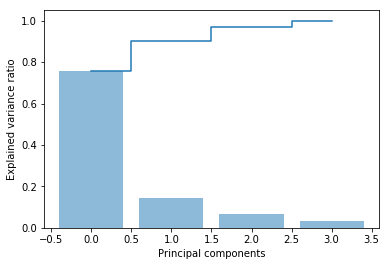

In [22]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA()
principalComponents = pca.fit_transform(X_train1)

print("Explained variance ratio:",pca.explained_variance_ratio_)
range_value = pca.explained_variance_ratio_.shape[0]

plt.bar(range(range_value), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(range_value), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

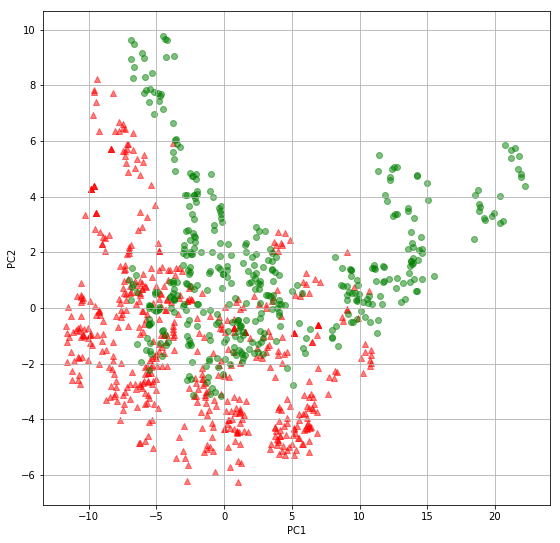

In [23]:
pca = PCA(n_components=2)
X_train_pca1 = pca.fit_transform(X_train1)
print

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(2,2,1) 

ax.scatter(X_train_pca1[y_train1 == 0, 0], X_train_pca1[y_train1 == 0, 1],
              color='red', marker='^', alpha=0.5)
ax.scatter(X_train_pca1[y_train1 == 1, 0], X_train_pca1[y_train1 == 1, 1],
              color='green', marker='o', alpha=0.5)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

# plt.savefig('./figures/half_moon_2.png', dpi=300)
ax.grid()
plt.show()

In [24]:
# The eigenvectors
print('eigenvectors\n', pca.components_)
# singular values
print('singular_ values\n', pca.singular_values_)

eigenvectors
 [[-0.13106622 -0.81165849  0.55114507  0.14237719]
 [-0.81139763  0.24837136  0.28754934 -0.44414065]]
singular_ values
 [217.82527752  94.7211152 ]


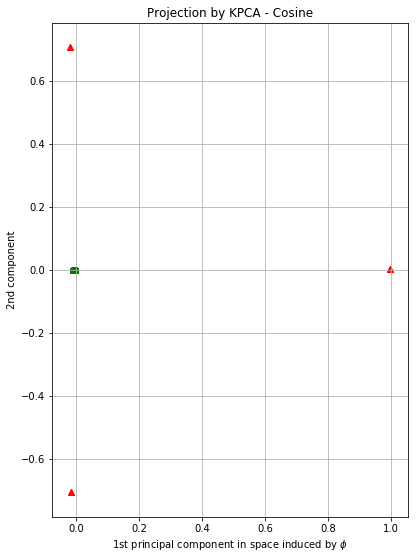

            0             1
0   -0.006113 -2.503195e-07
1   -0.004413 -1.580494e-07
2   -0.005797 -2.294215e-07
3   -0.006673 -2.861594e-07
4   -0.005679 -2.244424e-07
5   -0.004987 -1.863181e-07
6   -0.005731 -2.310341e-07
7   -0.006034 -2.462231e-07
8   -0.004429 -1.588256e-07
9   -0.006607 -2.880769e-07
10  -0.005171 -1.962862e-07
11  -0.004433 -1.590919e-07
12  -0.004418 -1.582926e-07
13  -0.004413 -1.580490e-07
14  -0.004438 -1.592587e-07
15  -0.004413 -1.580540e-07
16  -0.004472 -1.609167e-07
17  -0.005700 -2.252909e-07
18  -0.005644 -2.339499e-07
19  -0.004904 -1.822721e-07
20  -0.004436 -1.591871e-07
21  -0.004818 -1.779870e-07
22  -0.004609 -1.677096e-07
23  -0.004751 -1.745749e-07
24  -0.004420 -1.583973e-07
25  -0.005425 -2.278909e-07
26  -0.004547 -1.649531e-07
27  -0.004521 -1.634784e-07
28  -0.004435 -1.590831e-07
29  -0.005092 -1.920264e-07
..        ...           ...
930 -0.004485 -1.614757e-07
931 -0.004414 -1.580884e-07
932 -0.005564 -2.178262e-07
933 -0.004426 -1.586

In [25]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA( n_components = 2, kernel="rbf", fit_inverse_transform=True, gamma=10)
X_train_kpca1 = kpca.fit_transform(X_train1)
fig = plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1, aspect='equal')

plt.scatter(X_train_kpca1[y_train1 == 0, 0], X_train_kpca1[y_train1 == 0, 1], c="red",
            marker='^', alpha=0.5)
plt.scatter(X_train_kpca1[y_train1 == 1, 0], X_train_kpca1[y_train1 == 1, 1], c="green",
            marker='o', alpha=0.5)
plt.title("Projection by KPCA - Cosine")
plt.xlabel("1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")
plt.grid()
plt.show()

X_train1_v2 = pd.DataFrame(data=X_train_kpca1)
print(X_train1_v2)

### Nursery dataset

Explained variance ratio: [0.26980591 0.16983889 0.16842298 0.09116187 0.08989362 0.08875958
 0.0884742  0.03364295]


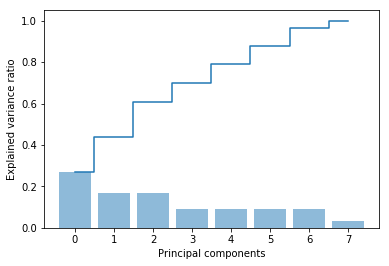

In [26]:
pca = PCA()
principalComponents = pca.fit_transform(X_train2)

print("Explained variance ratio:",pca.explained_variance_ratio_)
range_value = pca.explained_variance_ratio_.shape[0]

plt.bar(range(range_value), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(range_value), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [27]:
# The eigenvectors
print('eigenvectors\n', pca.components_)
# singular values
print('singular_ values\n', pca.singular_values_)

eigenvectors
 [[ 4.92772777e-04  9.99818471e-01  8.29728019e-04  1.67820557e-02
   5.96273263e-03  1.40931313e-03 -5.18315287e-04  6.53043362e-03]
 [ 1.35268621e-02 -1.51416370e-02 -3.84775021e-01  9.22725584e-01
   4.07631517e-03  2.73511691e-03  8.88683738e-04 -9.40991962e-03]
 [ 6.59806369e-03 -7.31101026e-03  9.22884710e-01  3.84701235e-01
   5.45132029e-03 -3.95620143e-03  7.57728922e-03  9.43414979e-03]
 [-4.16751744e-01  7.43359728e-03  9.56380433e-03  9.42283088e-03
  -7.79634714e-01 -3.41870329e-03 -1.74538142e-01 -4.33332357e-01]
 [-4.44685248e-01  1.64136592e-03  2.48855991e-03 -7.50202999e-04
   4.41116692e-01 -1.35033475e-03  5.24140701e-01 -5.77006366e-01]
 [-2.97458970e-01 -1.82745274e-03  6.45735489e-03  4.00225398e-03
   4.44377666e-01  3.08926045e-03 -8.25401434e-01 -1.80799684e-01]
 [ 7.34734448e-01  4.13356593e-03  8.37546899e-03 -1.39496524e-02
   4.51201947e-03  5.89710039e-03 -1.15998197e-01 -6.68111328e-01]
 [ 5.45091390e-03  1.38772546e-03 -4.66926355e-03  9.24

In [28]:
# Only two components for illustration
pca = PCA(n_components=7)
X_train_pca2 = pca.fit_transform(X_train2)
print(pca)

print(X_train_pca2)

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
[[-2.01804453 -1.93514808  0.80996313 ...  0.00528781 -0.13680295
  -0.7074466 ]
 [ 1.98709161 -1.95020967  0.80296099 ...  1.10586322 -0.49487712
   1.33969374]
 [ 1.00866415  0.11908647 -1.56026391 ... -0.49912345 -1.31439651
  -0.04425057]
 ...
 [ 2.03040884  1.55553903  0.09565144 ... -0.44005971 -0.44247968
  -0.01477778]
 [-1.99428866 -0.995708    1.19913646 ... -0.52317165  0.83951943
   0.13384842]
 [-0.00554957  0.12329973 -1.57048023 ...  0.08116044 -1.28177733
  -0.12541637]]


In [29]:
'''
pca = PCA(n_components=7)
X_spca2 = pca.fit_transform(X_train2)

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(2,2,1) 

ax.scatter(X_train_pca2[y_train2 == 0, 0], X_train_pca2[y_train2 == 0, 1],
              color='red', marker='^', alpha=0.5)
ax.scatter(X_train_pca2[y_train2 == 1, 0], X_train_pca2[y_train2 == 1, 1],
              color='green', marker='o', alpha=0.5)
ax.scatter(X_train_pca2[y_train2 == 2, 0], X_train_pca2[y_train2 == 2, 1],
              color='cyan', marker='x', alpha=0.5)
ax.scatter(X_train_pca2[y_train2 == 3, 0], X_train_pca2[y_train2 == 3, 1],
              color='blue', marker='s', alpha=0.5)
ax.scatter(X_train_pca2[y_train2 == 4, 0], X_train_pca2[y_train2 == 4, 1],
              color='yellow', marker='*', alpha=0.5)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

# plt.savefig('./figures/half_moon_2.png', dpi=300)
ax.grid()
plt.show()
'''

"\npca = PCA(n_components=7)\nX_spca2 = pca.fit_transform(X_train2)\n\nfig = plt.figure(figsize=(20, 20))\nax = fig.add_subplot(2,2,1) \n\nax.scatter(X_train_pca2[y_train2 == 0, 0], X_train_pca2[y_train2 == 0, 1],\n              color='red', marker='^', alpha=0.5)\nax.scatter(X_train_pca2[y_train2 == 1, 0], X_train_pca2[y_train2 == 1, 1],\n              color='green', marker='o', alpha=0.5)\nax.scatter(X_train_pca2[y_train2 == 2, 0], X_train_pca2[y_train2 == 2, 1],\n              color='cyan', marker='x', alpha=0.5)\nax.scatter(X_train_pca2[y_train2 == 3, 0], X_train_pca2[y_train2 == 3, 1],\n              color='blue', marker='s', alpha=0.5)\nax.scatter(X_train_pca2[y_train2 == 4, 0], X_train_pca2[y_train2 == 4, 1],\n              color='yellow', marker='*', alpha=0.5)\n\nax.set_xlabel('PC1')\nax.set_ylabel('PC2')\n\n# plt.savefig('./figures/half_moon_2.png', dpi=300)\nax.grid()\nplt.show()\n"

In [30]:
#from sklearn.decomposition import KernelPCA

#kpca = KernelPCA(n_components = 7 ,kernel="rbf", fit_inverse_transform=True, gamma=10)
#X_train_kpca2 = kpca.fit_transform(X_train2)

'''
fig= plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1, aspect='equal')

plt.scatter(X_train_kpca2[y_train2 == 0, 0], X_train_kpca2[y_train2 == 0, 1], c="red",
            marker='^', alpha=0.5)
plt.scatter(X_train_kpca2[y_train2 == 1, 0], X_train_kpca2[y_train2 == 1, 1], c="green",
            marker='o', alpha=0.5)
plt.scatter(X_train_kpca2[y_train2 == 2, 0], X_train_kpca2[y_train2 == 2, 1], c="cyan",
            marker='x', alpha=0.5)
plt.scatter(X_train_kpca2[y_train2 == 3, 0], X_train_kpca2[y_train2 == 3, 1], c="blue",
            marker='s', alpha=0.5)
plt.scatter(X_train_kpca2[y_train2 == 4, 0], X_train_kpca2[y_train2 == 4, 1], c="yellow",
            marker='*', alpha=0.5)
plt.title("Projection by KPCA")
plt.xlabel("1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")
plt.grid()
plt.show()
'''
#X_train2_v2 = pd.DataFrame(data=X_train_kpca2)

'\nfig= plt.figure(figsize=(20, 20))\n\nplt.subplot(2, 2, 1, aspect=\'equal\')\n\nplt.scatter(X_train_kpca2[y_train2 == 0, 0], X_train_kpca2[y_train2 == 0, 1], c="red",\n            marker=\'^\', alpha=0.5)\nplt.scatter(X_train_kpca2[y_train2 == 1, 0], X_train_kpca2[y_train2 == 1, 1], c="green",\n            marker=\'o\', alpha=0.5)\nplt.scatter(X_train_kpca2[y_train2 == 2, 0], X_train_kpca2[y_train2 == 2, 1], c="cyan",\n            marker=\'x\', alpha=0.5)\nplt.scatter(X_train_kpca2[y_train2 == 3, 0], X_train_kpca2[y_train2 == 3, 1], c="blue",\n            marker=\'s\', alpha=0.5)\nplt.scatter(X_train_kpca2[y_train2 == 4, 0], X_train_kpca2[y_train2 == 4, 1], c="yellow",\n            marker=\'*\', alpha=0.5)\nplt.title("Projection by KPCA")\nplt.xlabel("1st principal component in space induced by $\\phi$")\nplt.ylabel("2nd component")\nplt.grid()\nplt.show()\n'

## Task B - Predictive Model

In [31]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
# setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    #plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
            alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)

### MLP

#### Banknotes dataset

In [32]:
from sklearn.neural_network import MLPClassifier
#from sklearn.metrics import accuracy_score

#mlp = MLPClassifier(hidden_layer_sizes=(30,30,30), max_iter = 500)
#mlp = MLPClassifier(hidden_layer_sizes=(30,30,30), max_iter=500, alpha=0.0001,
 #   solver='sgd', verbose=10,  random_state=21,tol=0.000000001)
#mlp.fit(X_train1, y_train1)

mlp = MLPClassifier(activation='tanh', hidden_layer_sizes=(10,5), alpha=0.01, max_iter=5000)
mlp

MLPClassifier(activation='tanh', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=5000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [33]:
# Código que encontrei online
#y_pred = mlp.predict(X_test1)
#accuracy_score(y_test1, y_pred)

            0             1
0   -0.006113 -2.503195e-07
1   -0.004413 -1.580494e-07
2   -0.005797 -2.294215e-07
3   -0.006673 -2.861594e-07
4   -0.005679 -2.244424e-07
5   -0.004987 -1.863181e-07
6   -0.005731 -2.310341e-07
7   -0.006034 -2.462231e-07
8   -0.004429 -1.588256e-07
9   -0.006607 -2.880769e-07
10  -0.005171 -1.962862e-07
11  -0.004433 -1.590919e-07
12  -0.004418 -1.582926e-07
13  -0.004413 -1.580490e-07
14  -0.004438 -1.592587e-07
15  -0.004413 -1.580540e-07
16  -0.004472 -1.609167e-07
17  -0.005700 -2.252909e-07
18  -0.005644 -2.339499e-07
19  -0.004904 -1.822721e-07
20  -0.004436 -1.591871e-07
21  -0.004818 -1.779870e-07
22  -0.004609 -1.677096e-07
23  -0.004751 -1.745749e-07
24  -0.004420 -1.583973e-07
25  -0.005425 -2.278909e-07
26  -0.004547 -1.649531e-07
27  -0.004521 -1.634784e-07
28  -0.004435 -1.590831e-07
29  -0.005092 -1.920264e-07
..        ...           ...
930 -0.004485 -1.614757e-07
931 -0.004414 -1.580884e-07
932 -0.005564 -2.178262e-07
933 -0.004426 -1.586

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


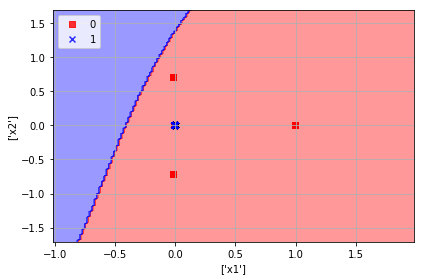

In [34]:
print(X_train1_v2)
mlp.fit(X_train1_v2.values,y_train1.values)
plot_decision_regions(X_train1_v2.values, y_train1.values, classifier=mlp)
plt.xlabel(['x1'])
plt.ylabel(['x2'])
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

In [35]:
print('Banknotes dataset')
print('the weights are \n',mlp.coefs_)
print('the bias \n ', mlp.intercepts_)
print('number of iterations \n', mlp.n_iter_)
print('output activation', mlp.out_activation_)

Banknotes dataset
the weights are 
 [array([[-0.33425004, -0.63442955, -0.22561128, -0.66411486, -0.26549241,
        -0.58118908, -0.12637456,  0.57685955, -0.23126369, -0.35652928],
       [-0.05159282,  0.2305072 ,  0.17910652,  0.44880173,  0.50651007,
        -0.55801314,  0.51986347,  0.25081104,  0.18823454,  0.35139975]]), array([[-0.38456985,  0.48662751, -0.02581028, -0.58768778,  0.48726102],
       [ 0.41045565, -0.10884319, -0.20186956, -0.13088728,  0.6302332 ],
       [-0.21737735,  0.14915438, -0.56039288,  0.07134734,  0.49448635],
       [ 0.61726059,  0.37456885, -0.25936711, -0.35200327,  0.16533159],
       [-0.40721239, -0.4547088 ,  0.36499543, -0.07441006, -0.32043548],
       [ 0.49374613,  0.3116844 ,  0.25692597,  0.16387615,  0.25785716],
       [ 0.72849301, -0.18475482,  0.5040708 , -0.68913428, -0.4471317 ],
       [ 0.14540792, -0.07025495,  0.45356983, -0.03599107,  0.04471057],
       [-0.31568029,  0.55740572,  0.54950311,  0.0531583 , -0.11484896],
 

#### Nursery dataset

In [36]:
mlp = MLPClassifier(activation='tanh', hidden_layer_sizes=(10,5), alpha=0.01, max_iter=5000)
mlp

MLPClassifier(activation='tanh', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=5000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [37]:
mlp.fit(X_train2.values,y_train2.values)
#plot_decision_regions(X_train2.values, y_train2.values, classifier=mlp)
#plt.xlabel(['x1'])
#plt.ylabel(['x2'])
#plt.legend(loc='upper left')
#plt.grid()
#plt.tight_layout()
#plt.show()

MLPClassifier(activation='tanh', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=5000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [38]:
print('Nursery dataset')
print('the weights are \n',mlp.coefs_)
print('the bias \n ', mlp.intercepts_)
print('number of iterations \n', mlp.n_iter_)
print('output activation', mlp.out_activation_)

Nursery dataset
the weights are 
 [array([[-0.1148222 ,  0.02933576,  0.9045671 ,  0.1917477 , -0.08130231,
        -0.53837107,  0.10990354,  0.74295874,  0.033296  ,  0.81643078],
       [-0.13289285,  0.0271772 , -2.47068699,  0.1479702 , -0.0880925 ,
        -0.55691086,  0.06546017,  0.72673165,  0.03524197, -0.35352402],
       [-0.03524251, -0.14673343, -0.03454562, -0.0063857 ,  0.07619879,
        -0.08256707,  0.53847985, -0.08291803, -0.33715763, -0.02492711],
       [-0.07377327, -0.24873433, -0.05321711,  0.02305138,  0.12727826,
        -0.12062187,  0.84985715, -0.10229701, -0.50658554,  0.09470465],
       [-0.03265137,  0.94108467, -0.09061587,  0.01961606,  0.16379522,
        -0.14426067, -1.20798542, -0.14172655, -0.04760388,  0.39257385],
       [ 0.06786378,  1.6221266 , -0.09771258, -0.05560935,  0.09801183,
        -0.17645834, -0.18705378, -0.12969499,  0.06378238, -0.15857806],
       [-0.21299755,  0.13261732,  0.21430107, -0.92642725, -1.10824604,
         0

### SVM

#### Banknotes dataset

In [39]:
from sklearn.svm import SVC

svm=SVC(C=1.0,kernel='rbf', max_iter=2000, tol=1e-05, verbose=0)
svm

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=2000, probability=False, random_state=None,
  shrinking=True, tol=1e-05, verbose=0)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


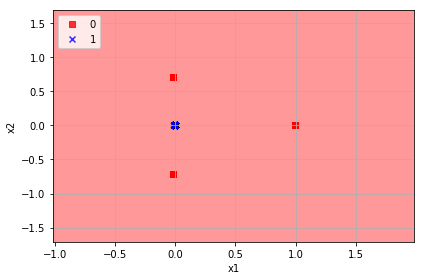

In [40]:
svm=svm.fit(X_train1_v2.values, y_train1.values)
plot_decision_regions(X_train1_v2.values, y_train1.values, classifier=svm)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

In [41]:
print('Banknotes dataset')
print('dual coef \n', svm.dual_coef_)
print ('support vectors \n', svm.support_vectors_)
print('index of support vectors \n ', svm.support_)
print ('bias', svm.intercept_)
print('the classifier \n', svm)

Banknotes dataset
dual coef 
 [[-1.00000000e+00 -1.00000000e+00 -1.00000000e+00 -1.00000000e+00
  -1.00000000e+00 -1.00000000e+00 -1.00000000e+00 -1.00000000e+00
  -1.00000000e+00 -1.00000000e+00 -1.00000000e+00 -1.00000000e+00
  -1.00000000e+00 -1.00000000e+00 -1.00000000e+00 -1.00000000e+00
  -1.00000000e+00 -1.00000000e+00 -1.00000000e+00 -1.00000000e+00
  -1.00000000e+00 -1.00000000e+00 -1.00000000e+00 -1.00000000e+00
  -1.00000000e+00 -1.00000000e+00 -1.00000000e+00 -1.00000000e+00
  -1.00000000e+00 -1.00000000e+00 -1.00000000e+00 -1.00000000e+00
  -1.00000000e+00 -1.00000000e+00 -1.00000000e+00 -1.00000000e+00
  -1.00000000e+00 -1.00000000e+00 -1.00000000e+00 -1.00000000e+00
  -1.00000000e+00 -1.00000000e+00 -1.00000000e+00 -1.00000000e+00
  -1.00000000e+00 -1.00000000e+00 -1.00000000e+00 -1.00000000e+00
  -1.00000000e+00 -1.00000000e+00 -1.00000000e+00 -9.92730870e-01
  -1.00000000e+00 -1.00000000e+00 -1.00000000e+00 -1.00000000e+00
  -1.00000000e+00 -1.00000000e+00 -1.00000000e

#### Nursery dataset

In [42]:
svm=SVC(C=1.0,kernel='rbf', max_iter=4000, tol=1e-05, verbose=0)
svm

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=4000, probability=False, random_state=None,
  shrinking=True, tol=1e-05, verbose=0)

In [43]:
svm=svm.fit(X_train2.values, y_train2.values)
#plot_decision_regions(X_train2.values, y_train2.values, classifier=svm)
#plt.xlabel('x1')
#plt.ylabel('x2')
#plt.legend(loc='upper left')
#plt.grid()
#plt.tight_layout()
#plt.show()

In [44]:
print('Nursery dataset')
print('dual coef \n', svm.dual_coef_)
print ('support vectors \n', svm.support_vectors_)
print('index of support vectors \n ', svm.support_)
print ('bias', svm.intercept_)
print('the classifier \n', svm)

Nursery dataset
dual coef 
 [[ 0.03118633  0.          1.         ... -0.         -0.
  -0.        ]
 [ 0.64002215  1.          0.14832994 ... -1.         -1.
  -1.        ]
 [ 0.          0.          0.04198659 ... -0.         -0.
  -0.        ]]
support vectors 
 [[3. 5. 4. ... 2. 3. 3.]
 [1. 5. 1. ... 2. 3. 3.]
 [3. 5. 1. ... 1. 1. 3.]
 ...
 [2. 2. 3. ... 1. 2. 1.]
 [1. 2. 3. ... 1. 2. 1.]
 [2. 1. 1. ... 1. 1. 1.]]
index of support vectors 
  [  79   89  125 ... 8982 8983 8985]
bias [ 0.32286873  0.16684542  0.55981039 -0.33573037  3.70951073  1.05406445]
the classifier 
 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=4000, probability=False, random_state=None,
  shrinking=True, tol=1e-05, verbose=0)
